In [12]:
import pandas as pd
import matplotlib.pyplot as plt

In [13]:
df = pd.read_csv('C:/Users/u0153325/OneDrive - Hogeschool VIVES/Documenten/VIS/DeepRetail/DeepRetail/data/data_folder/m5_day.csv', index_col=0)
df.head()

,2011-01-29,2011-01-30,2011-01-31,2011-02-01,2011-02-02,2011-02-03,2011-02-04,2011-02-05,2011-02-06,2011-02-07,...,2016-04-15,2016-04-16,2016-04-17,2016-04-18,2016-04-19,2016-04-20,2016-04-21,2016-04-22,2016-04-23,2016-04-24
unique_id,,,,,,,,,,,,,,,,,,,,,
HOBBIES_1_001_CA_1,0,0,0,0,0,0,0,0,0,0,...,1,3,0,1,1,1,3,0,1,1
HOBBIES_1_002_CA_1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
HOBBIES_1_003_CA_1,0,0,0,0,0,0,0,0,0,0,...,2,1,2,1,1,1,0,1,1,1
HOBBIES_1_004_CA_1,0,0,0,0,0,0,0,0,0,0,...,1,0,5,4,1,0,1,3,7,2
HOBBIES_1_005_CA_1,0,0,0,0,0,0,0,0,0,0,...,2,1,1,0,1,1,2,2,2,4


#### Select the Sample

In [14]:
# Will pick a whole state as the sample!

In [ ]:
# check which state is the busiet
temp_df = df.copy()

# Get the state of every item. I will split the index on "_" and take the second from last split
temp_df['state_id'] = temp_df.index.str.split('_').str[-2]

# Groupby state and sum the sales
temp_df = temp_df.groupby('state_id').sum()


In [17]:
# Convert columsn to datetime
temp_df.columns = pd.to_datetime(temp_df.columns)

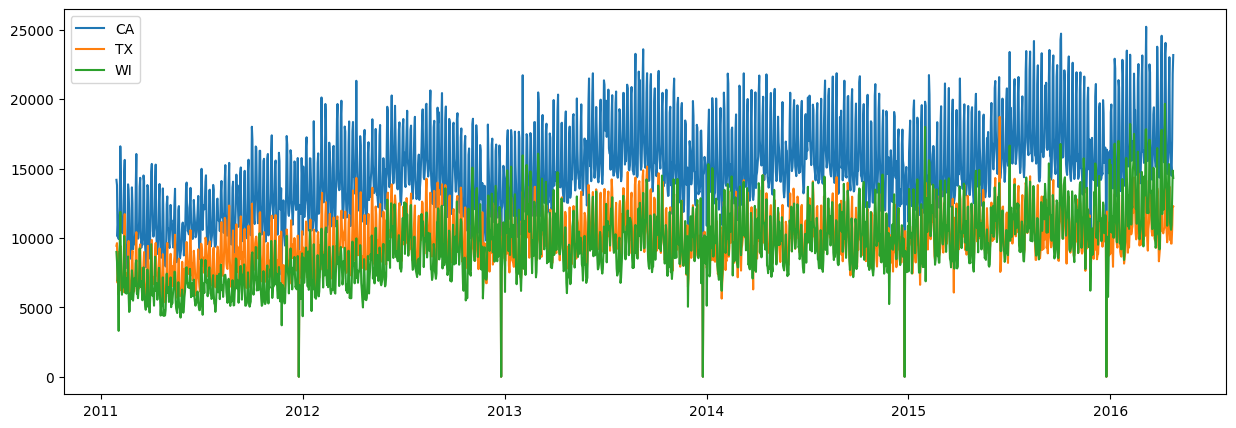

In [18]:
# Plot a line plot for each state
fig, ax = plt.subplots(figsize=(15, 5))
for state in temp_df.index:
    ax.plot(temp_df.loc[state], label=state)
ax.legend()
plt.show()

In [21]:
# I will pick CA

# Filtering the original dataframe
sample_df = df[df.index.str.contains('CA')]
sample_df.head()

,2011-01-29,2011-01-30,2011-01-31,2011-02-01,2011-02-02,2011-02-03,2011-02-04,2011-02-05,2011-02-06,2011-02-07,...,2016-04-15,2016-04-16,2016-04-17,2016-04-18,2016-04-19,2016-04-20,2016-04-21,2016-04-22,2016-04-23,2016-04-24
unique_id,,,,,,,,,,,,,,,,,,,,,
HOBBIES_1_001_CA_1,0,0,0,0,0,0,0,0,0,0,...,1,3,0,1,1,1,3,0,1,1
HOBBIES_1_002_CA_1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
HOBBIES_1_003_CA_1,0,0,0,0,0,0,0,0,0,0,...,2,1,2,1,1,1,0,1,1,1
HOBBIES_1_004_CA_1,0,0,0,0,0,0,0,0,0,0,...,1,0,5,4,1,0,1,3,7,2
HOBBIES_1_005_CA_1,0,0,0,0,0,0,0,0,0,0,...,2,1,1,0,1,1,2,2,2,4


In [23]:
# Saving
sample_df.to_csv('C:/Users/u0153325/OneDrive - Hogeschool VIVES/Documenten/VIS/DeepRetail/DeepRetail/data/data_folder/m5_day_sample_for_developers.csv')

In [26]:
# Convert columns to datetime
sample_df.columns = pd.to_datetime(sample_df.columns)

In [28]:
# Also add monthly aggregations

# Resample columns to monthly
sample_df_m = sample_df.resample('M', axis=1).sum()

# Save
sample_df_m.to_csv('C:/Users/u0153325/OneDrive - Hogeschool VIVES/Documenten/VIS/DeepRetail/DeepRetail/data/data_folder/m5_month_sample_for_developers.csv')